# Importing library

In [ ]:
import datetime

import IPython
import IPython.display
from pylab import rcParams
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

In [ ]:
# Setup environment
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
# set styles
register_matplotlib_converters()
# set seaborn style
sns.set(style='whitegrid', palette='muted', font_scale=1)
# set plotting parameters
rcParams['figure.figsize'] = 16, 6

In [ ]:
# Load data Mac
df_input = pd.read_csv('/content/weather-energy-data-update.csv', index_col="Datetime", parse_dates=True)

#EDA

In [ ]:
df_input.shape

(26328, 17)

In [ ]:
df_input.head()

,kWh,hour,day_of_month,day_of_week,month,is_weekend,pressure_at_sea,precip_dur_past10min,wind_dir,wind_speed,temp_dew,pressure,visib_mean_last10min,temp_dry,humidity,cloud_cover,visibility
Datetime,,,,,,,,,,,,,,,,,
2018-11-01 00:00:00,0.247,0.0,1.0,3.0,11.0,0,1017.966667,0.0,115.166667,2.616667,5.900000,1011.083333,8150.00000,6.150000,98.333333,5.000000,7666.666667
2018-11-01 01:00:00,0.131,1.0,1.0,3.0,11.0,0,1017.750000,0.0,119.500000,2.733333,6.250000,1010.883333,13666.66667,6.833333,96.166667,44.166667,13333.333330
2018-11-01 02:00:00,0.132,2.0,1.0,3.0,11.0,0,1017.500000,0.0,121.500000,3.016667,5.950000,1010.600000,22416.66667,7.383333,90.833333,77.500000,22000.000000
2018-11-01 03:00:00,0.076,3.0,1.0,3.0,11.0,0,1017.366667,0.0,124.166667,3.700000,5.616667,1010.533333,31483.33333,7.766667,86.166667,95.000000,29666.666670
2018-11-01 04:00:00,0.061,4.0,1.0,3.0,11.0,0,1016.916667,0.0,117.666667,3.333333,5.516667,1010.100000,36266.66667,7.866667,85.000000,95.000000,34166.666670


In [ ]:
df_input.tail()

,kWh,hour,day_of_month,day_of_week,month,is_weekend,pressure_at_sea,precip_dur_past10min,wind_dir,wind_speed,temp_dew,pressure,visib_mean_last10min,temp_dry,humidity,cloud_cover,visibility
Datetime,,,,,,,,,,,,,,,,,
2021-11-01 19:00:00,0.061,19.0,1.0,0.0,11.0,0,998.266667,0.0,191.166667,6.100000,6.983333,991.650000,38500.00000,10.416667,79.333333,100.000000,34166.66667
2021-11-01 20:00:00,0.853,20.0,1.0,0.0,11.0,0,998.600000,0.0,196.166667,4.983333,6.833333,991.916667,40266.66667,10.233333,79.500000,89.166667,37500.00000
2021-11-01 21:00:00,0.319,21.0,1.0,0.0,11.0,0,998.733333,0.0,197.833333,4.100000,6.633333,992.066667,40566.66667,9.550000,82.000000,16.666667,38333.33333
2021-11-01 22:00:00,0.318,22.0,1.0,0.0,11.0,0,998.816667,0.0,187.833333,3.450000,6.366667,992.116667,32750.00000,8.683333,85.333333,8.333333,31000.00000
2021-11-01 23:00:00,0.234,23.0,1.0,0.0,11.0,0,998.983333,0.0,179.333333,2.833333,6.200000,992.250000,28316.66667,7.883333,89.000000,5.833333,27333.33333


In [ ]:
df_input[df_input["kWh"]>2]

,kWh,hour,day_of_month,day_of_week,month,is_weekend,pressure_at_sea,precip_dur_past10min,wind_dir,wind_speed,temp_dew,pressure,visib_mean_last10min,temp_dry,humidity,cloud_cover,visibility
Datetime,,,,,,,,,,,,,,,,,
2020-10-09 20:00:00,2.438,20.0,9.0,4.0,10.0,0,1011.200000,0.0,180.166667,2.85,8.250000,1004.433333,41733.333330,9.000000,95.500000,100.000000,39500.000000
2020-12-19 20:00:00,2.429,20.0,19.0,5.0,12.0,1,1012.550000,0.5,184.000000,4.70,5.116667,1005.700000,6483.333333,5.583333,96.833333,91.666667,6166.666667
2020-12-19 21:00:00,2.135,21.0,19.0,5.0,12.0,1,1012.733333,0.0,181.500000,5.20,5.950000,1005.916667,5800.000000,6.400000,96.833333,100.000000,5633.333333
2021-04-10 20:00:00,2.126,20.0,10.0,5.0,4.0,1,1016.883333,0.0,170.000000,0.35,-1.133333,1009.900000,48500.000000,0.916667,86.166667,6.666667,45833.333330


In [ ]:
# create daily, weekly, and yearly signals
# Set datetime as index
timestamp_s = df_input.index.map(pd.Timestamp.timestamp)
day = 24*60*60
week = 24*60*60*7
year = (365.2425)*day

df_input['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_input['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))

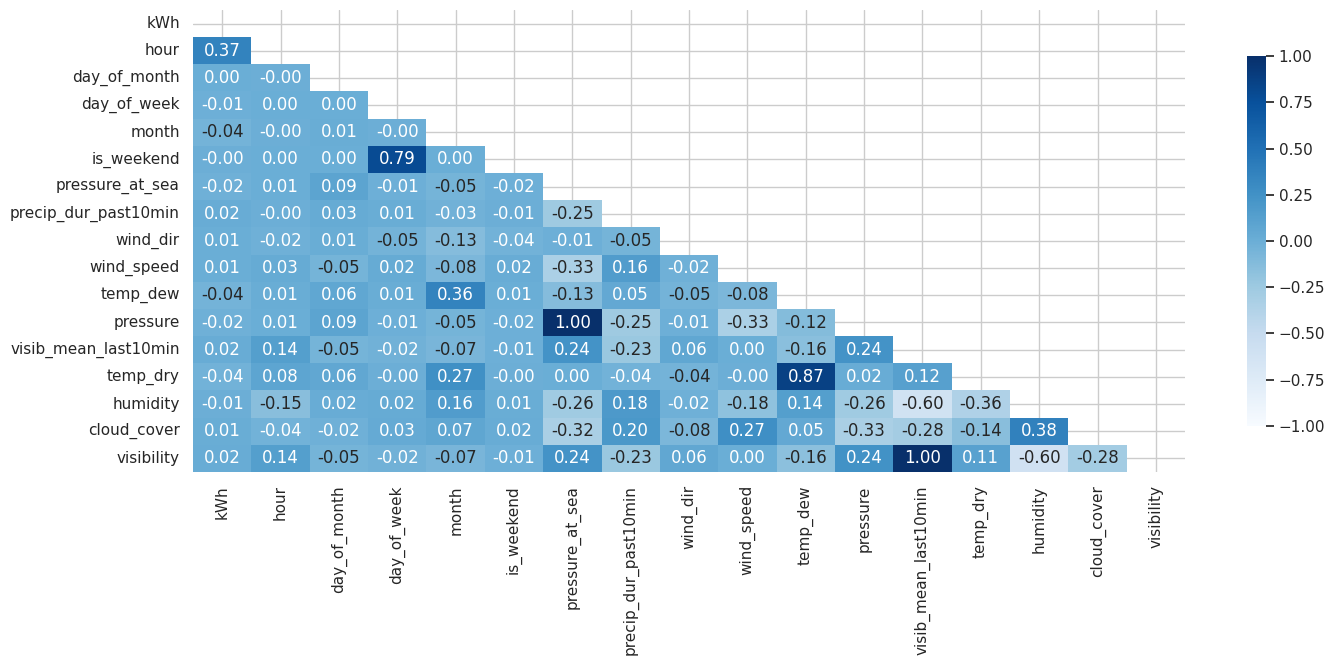

In [ ]:
# Get correlations
df_input_corr = df_input.corr()

# Create mask
mask = np.triu(np.ones_like(df_input_corr, dtype=bool))

# Plot heatmap
sns.heatmap(df_input_corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
            vmin=-1, vmax=1, cbar_kws={"shrink": .8})

plt.show()


##Algorithms and Forecasting Approaches

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.9 MB/s eta 0:00:00


In [ ]:
# import libraries for time series analysis
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import mse,rmse
from sklearn.metrics import mean_absolute_percentage_error as maperror    # for ETS Plots
from pmdarima import auto_arima

In [ ]:
# load dataset
#Slicing the DataFrame by date range and removing the first column
df_input = pd.read_csv('/content/weather-energy-data-update.csv', index_col="Datetime", parse_dates=True)#.iloc[:,1:]

df_input = df_input['20201001':'20211031']  #This slices the DataFrame to include only the data between November 1, 2018, and October 31, 2021.

In [ ]:
df_input.shape

(9504, 17)

In [ ]:
df_input.tail()

,kWh,hour,day_of_month,day_of_week,month,is_weekend,pressure_at_sea,precip_dur_past10min,wind_dir,wind_speed,temp_dew,pressure,visib_mean_last10min,temp_dry,humidity,cloud_cover,visibility
Datetime,,,,,,,,,,,,,,,,,
2021-10-31 19:00:00,0.336,19.0,31.0,6.0,10.0,1,999.400000,0.0,135.500000,4.966667,10.116667,992.750000,12233.33333,11.150000,93.500000,100.000000,11500.000000
2021-10-31 20:00:00,0.749,20.0,31.0,6.0,10.0,1,997.483333,0.0,129.333333,5.333333,10.516667,990.850000,11950.00000,11.516667,93.666667,95.000000,11500.000000
2021-10-31 21:00:00,0.149,21.0,31.0,6.0,10.0,1,996.133333,0.0,133.333333,5.000000,10.700000,989.533333,13983.33333,11.916667,92.500000,90.000000,13333.333330
2021-10-31 22:00:00,0.171,22.0,31.0,6.0,10.0,1,994.583333,0.0,147.000000,6.233333,10.750000,988.016667,13383.33333,12.050000,92.000000,90.000000,12833.333330
2021-10-31 23:00:00,0.159,23.0,31.0,6.0,10.0,1,993.800000,1.0,154.833333,7.266667,11.000000,987.233333,8050.00000,11.933333,94.166667,96.666667,7633.333333


In [ ]:
df_input[['kWh', 'hour']]

,kWh,hour
Datetime,,
2020-10-01 00:00:00,0.419,0.0
2020-10-01 01:00:00,0.319,1.0
2020-10-01 02:00:00,0.094,2.0
2020-10-01 03:00:00,0.127,3.0
2020-10-01 04:00:00,0.113,4.0
...,...,...
2021-10-31 19:00:00,0.336,19.0
2021-10-31 20:00:00,0.749,20.0
2021-10-31 21:00:00,0.149,21.0


In [ ]:
# dataframe for SARIMAX
df_H = df_input[['kWh', 'hour']]
df_H['hour'] = df_H['hour'].astype("category")

<ipython-input-9-930980a9a210>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_H['hour'] = df_H['hour'].astype("category")


In [ ]:
df_H.shape

(9504, 2)

In [ ]:
df_H.head()

,kWh,hour
Datetime,,
2020-10-01 00:00:00,0.419,0.0
2020-10-01 01:00:00,0.319,1.0
2020-10-01 02:00:00,0.094,2.0
2020-10-01 03:00:00,0.127,3.0
2020-10-01 04:00:00,0.113,4.0


In [ ]:
df_H.isna().sum()

,0
kWh,0
hour,0


In [ ]:
df_H['hour'].value_counts()

,count
hour,
0.0,396
1.0,396
22.0,396
21.0,396
20.0,396
19.0,396
18.0,396
17.0,396
16.0,396


In [ ]:
df_H_dummies = pd.get_dummies(df_H['hour']).astype(int)

In [ ]:
# from pickle import TRUE
# df_H_dummies.drop(df_H_dummies.iloc[:,2:26], inplace=True, axis=1)

In [ ]:
df_H_dummies.head()

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-10-01 00:00:00,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 01:00:00,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 02:00:00,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 03:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 04:00:00,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_H = pd.merge(df_H, df_H_dummies, how='left', left_index=True, right_index=True)

In [ ]:
df_H.head()

,kWh,hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-10-01 00:00:00,0.419,0.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 01:00:00,0.319,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 02:00:00,0.094,2.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 03:00:00,0.127,3.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 04:00:00,0.113,4.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_H.drop('hour', inplace=True, axis=1)

In [ ]:
df_H.head()

,kWh,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-10-01 00:00:00,0.419,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 01:00:00,0.319,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 02:00:00,0.094,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 03:00:00,0.127,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 04:00:00,0.113,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# # add weekly dummy variables
# df_H_dummies = pd.get_dummies(df_H['hour'])
# df_H_dummies.drop(df_H_dummies.iloc[:,2:26], inplace=True, axis=1)
# df_H = pd.merge(df_H, df_H_dummies, how='left', left_index=True, right_index=True)
# df_H.drop('hour', inplace=True, axis=1)

The hour column contains values from 0 to 23, representing the hours of the day. Treating hour as a continuous variable (like temperature or pressure) wouldn't make sense because the difference between 1 AM and 2 AM isn't the same as the difference between 1 AM and 12 PM. Dummy variables treat each hour as a separate category, allowing the model to learn specific effects for each hour.

In [ ]:
df_H.shape

(9504, 25)

In [ ]:
df_H.tail()

,kWh,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Datetime,,,,,,,,,,,,,,,,,,,,,
2021-10-31 19:00:00,0.336,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2021-10-31 20:00:00,0.749,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2021-10-31 21:00:00,0.149,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2021-10-31 22:00:00,0.171,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2021-10-31 23:00:00,0.159,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# reduce series load to circumvent scaling issues with auto_arima
df_H_auto = df_H['20211001':'20211031']

#Original KWh Plot

<Axes: xlabel='Datetime'>

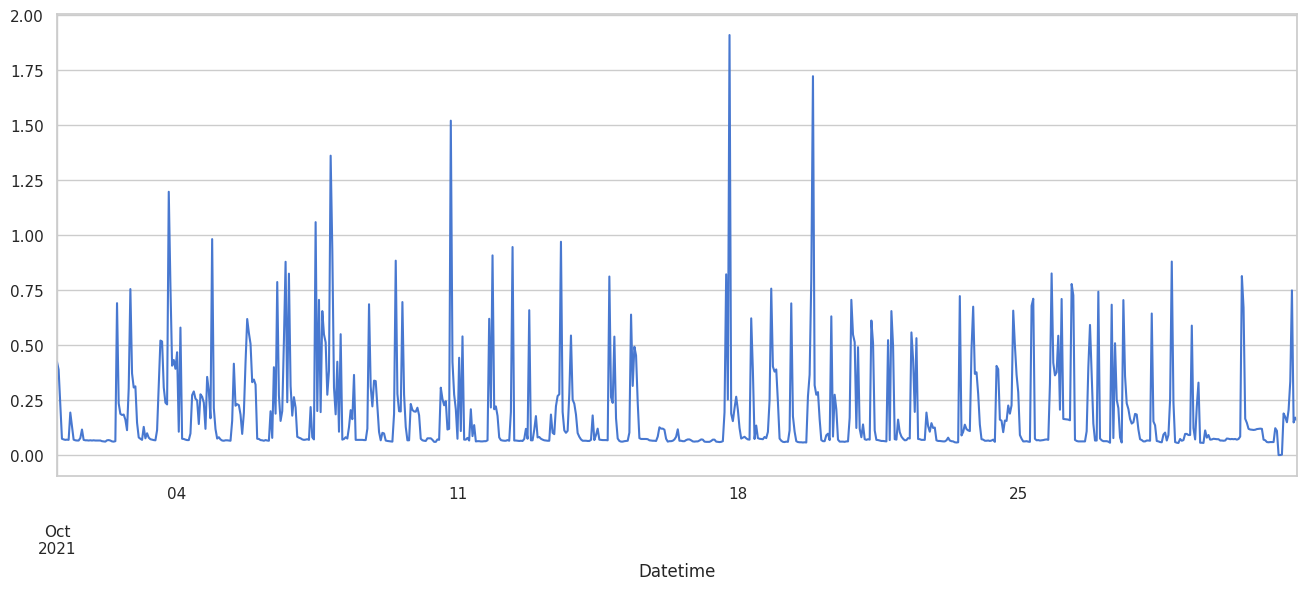

In [ ]:
df_H_auto["kWh"].plot()

In [ ]:
df_H["kWh"]

,kWh
Datetime,
2020-10-01 00:00:00,0.419
2020-10-01 01:00:00,0.319
2020-10-01 02:00:00,0.094
2020-10-01 03:00:00,0.127
2020-10-01 04:00:00,0.113
...,...
2021-10-31 19:00:00,0.336
2021-10-31 20:00:00,0.749
2021-10-31 21:00:00,0.149


#ACF/PACF

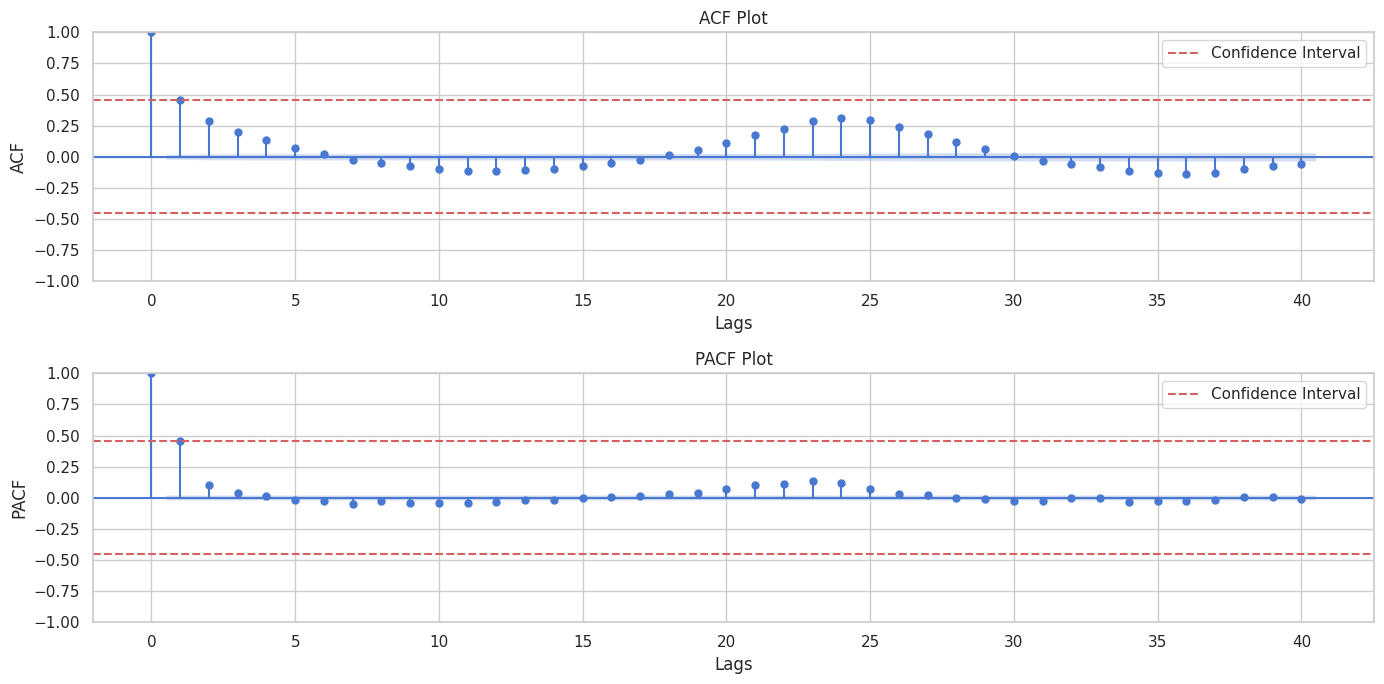

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a figure and axes for the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7))

# ACF Plot
plot_acf(df_H["kWh"], ax=ax1, lags=40, alpha=0.05)  # alpha controls the confidence interval
ax1.set_title('ACF Plot')
ax1.set_xlabel('Lags')
ax1.set_ylabel('ACF')

# Adding boundary lines to ACF plot
acf_lines = ax1.get_lines()
if len(acf_lines) > 1:  # Ensure that we have the confidence interval lines
    acf_conf_int = acf_lines[1].get_ydata()  # Extract confidence interval
    ax1.axhline(y=acf_conf_int[1], color='r', linestyle='--', label='Confidence Interval')
    ax1.axhline(y=-acf_conf_int[1], color='r', linestyle='--')

ax1.legend()

# PACF Plot
plot_pacf(df_H["kWh"], ax=ax2, lags=40, alpha=0.05)  # alpha controls the confidence interval
ax2.set_title('PACF Plot')
ax2.set_xlabel('Lags')
ax2.set_ylabel('PACF')

# Adding boundary lines to PACF plot
pacf_lines = ax2.get_lines()
if len(pacf_lines) > 1:  # Ensure that we have the confidence interval lines
    pacf_conf_int = pacf_lines[1].get_ydata()  # Extract confidence interval
    ax2.axhline(y=pacf_conf_int[1], color='r', linestyle='--', label='Confidence Interval')
    ax2.axhline(y=-pacf_conf_int[1], color='r', linestyle='--')

ax2.legend()

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

seasonal_period = 24

# Assuming `time_series` is your time series data and `seasonal_period` is the seasonal period
decomposition_add = seasonal_decompose(df_H_auto["kWh"], model='additive', period=seasonal_period)


In [ ]:
# Extract the components
trend = decomposition_add.trend
seasonal = decomposition_add.seasonal
residual = decomposition_add.resid

# Plotting each component
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

# Original time series

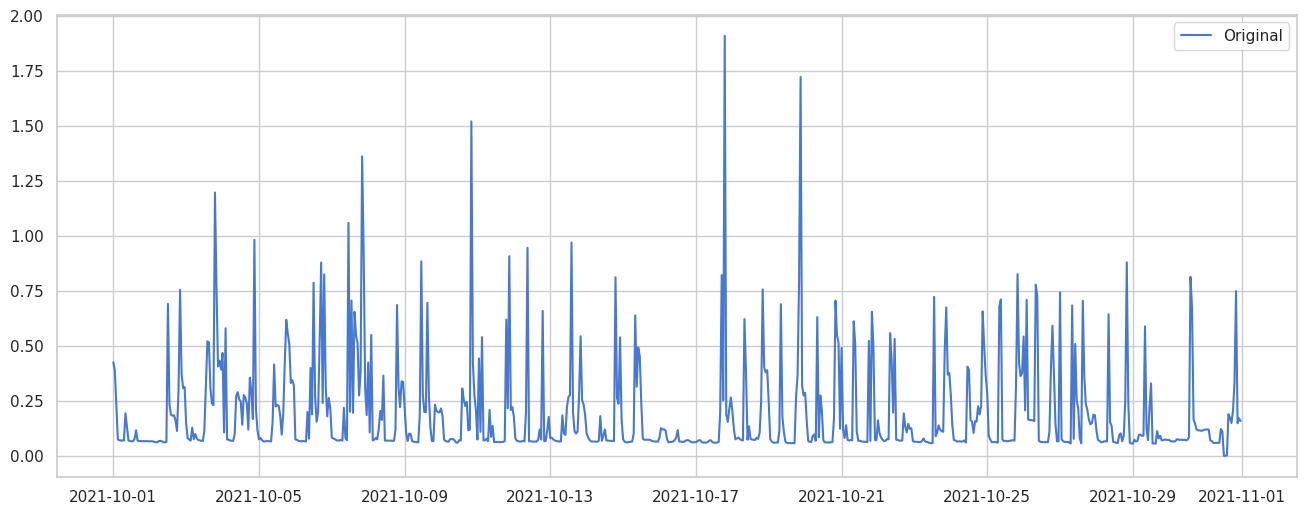

In [ ]:

# Plotting each component
#plt.figure(figsize=(10, 8))
plt.plot(df_H_auto["kWh"], label='Original')
plt.legend(loc='best')

# Trend component

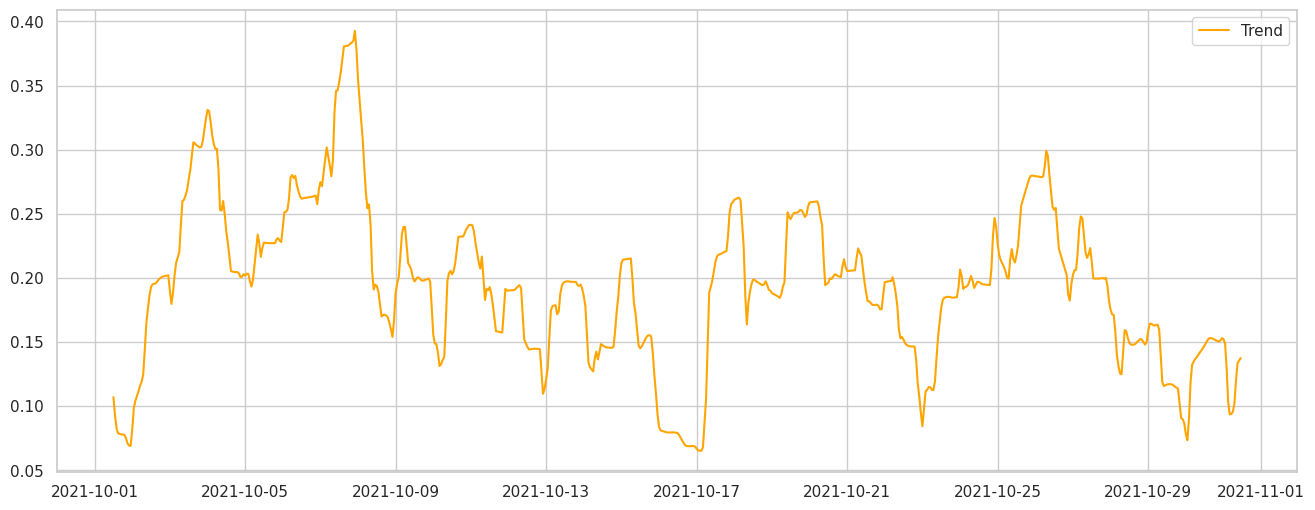

In [ ]:

# Plotting each component
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')


# Seasonal component

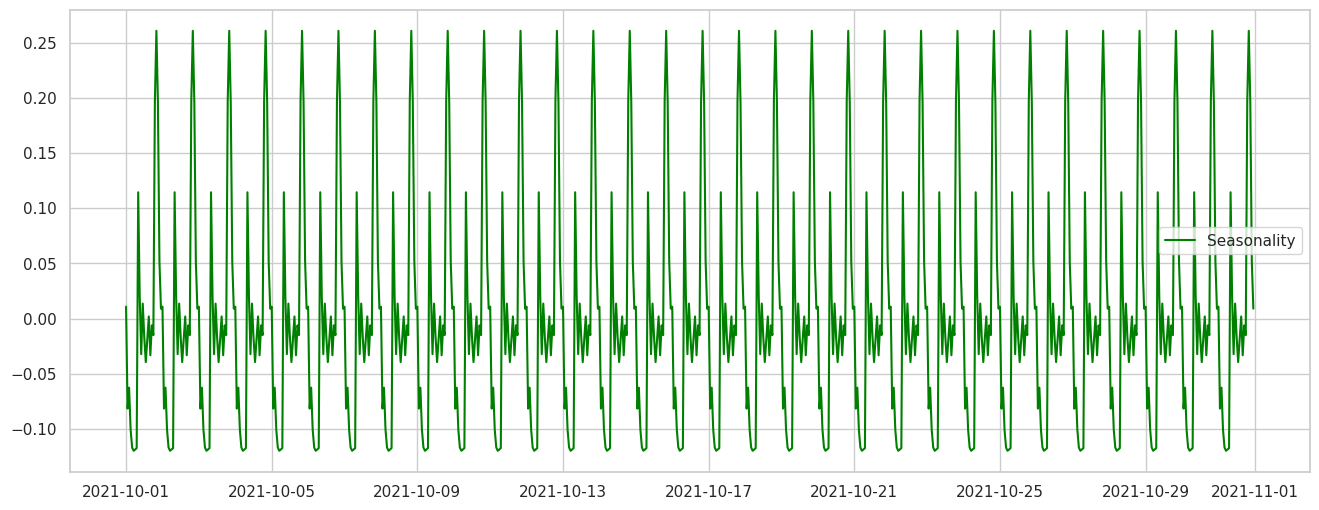

In [ ]:

# Plotting each component
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')

# Residual component

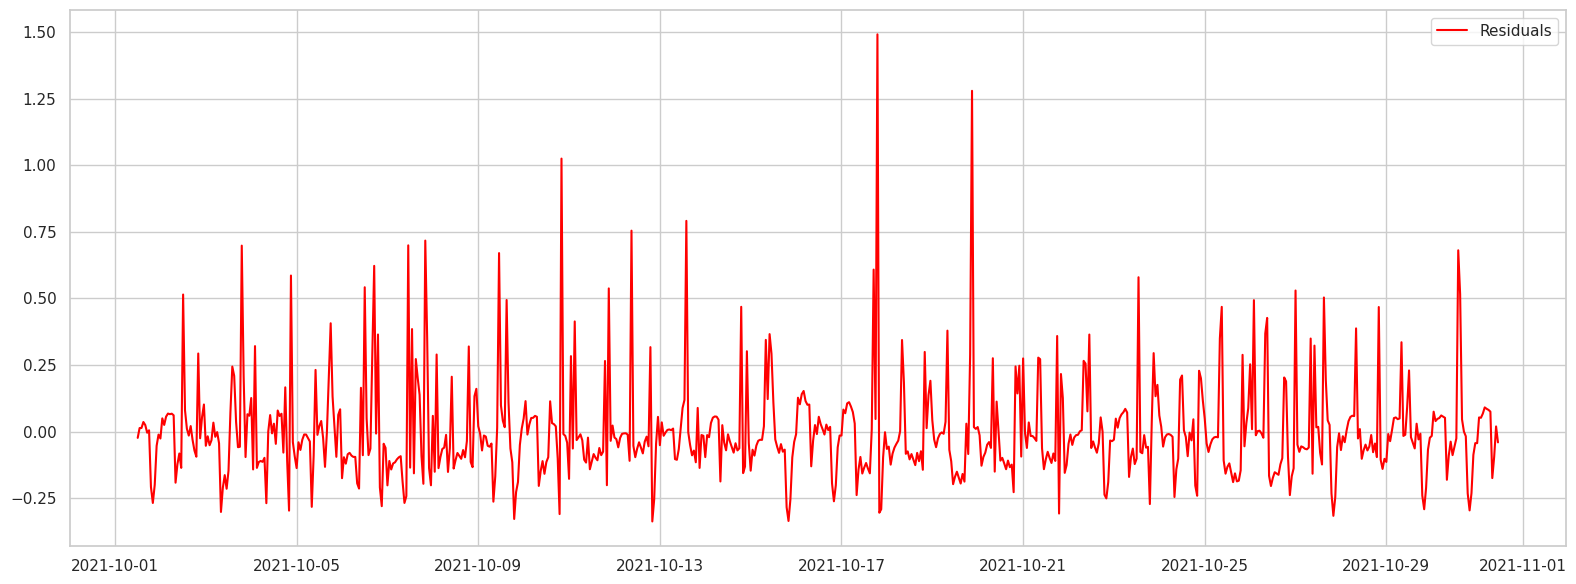

In [ ]:

# Plotting each component
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
df_H_auto.shape

(744, 25)

In [ ]:
# run auto arima on hourly data ARIMA
#auto_arima(df_H_auto['kWh']).summary()
auto_arima(df_H_auto['kWh'],seasonal=False).summary()
# SARIMAX(2, 0, 0)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  744
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 111.628
Date:                Wed, 21 Aug 2024   AIC                           -215.256
Time:                        14:16:06   BIC                           -196.808
Sample:                    10-01-2021   HQIC                          -208.145
                         - 10-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1136      0.016      7.308      0.000       0.083       0.144
ar.L1          0.2895      0.027     10.780      0.000       0.237       0.342
ar.L2          0.1213      0.030      4.060      0.000       0.063       0.180
sigma2         0.0434      0.001     30.831      0.000       0.041       0.046
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6124.06
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                             3.01
Prob(H) (two-sided):                  0.01   Kurtosis:                        15.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# run auto arima on hourly data SARIMA
auto_arima(df_H_auto['kWh'],seasonal=True,m=24).summary()
# SARIMAX(2, 0, 0)x(2, 0, 0, 24)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  744
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 24)   Log Likelihood                 122.285
Date:                            Wed, 21 Aug 2024   AIC                           -232.570
Time:                                    14:20:26   BIC                           -204.898
Sample:                                10-01-2021   HQIC                          -221.903
                                     - 10-31-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0930      0.018      5.118      0.000       0.057       0.129
ar.L1          0.2494      0.028      8.968      0.000       0.195       0.304
ar.L2          0.1221      0.029      4.208      0.000       0.065       0.179
ar.S.L24       0.1232      0.036      3.439      0.001       0.053       0.193
ar.S.L48       0.1039      0.034      3.014      0.003       0.036       0.171
sigma2         0.0421      0.001     31.525      0.000       0.039       0.045
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7074.65
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             3.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Test for stationarity

In [ ]:
# run ADF test
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")



In [ ]:
# use ADF function
adf_test(df_H['kWh'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.153280e+01
p-value                 3.795943e-21
# lags used             3.600000e+01
# observations          9.467000e+03
critical value (1%)    -3.431041e+00
critical value (5%)    -2.861845e+00
critical value (10%)   -2.566933e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


First, we split the dataset into train and test set and create a second data frame for our exogenous variables.

In [ ]:
df_H.head()

,kWh,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-10-01 00:00:00,0.419,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 01:00:00,0.319,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 02:00:00,0.094,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 03:00:00,0.127,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 04:00:00,0.113,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train1

,kWh,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Datetime,,,,,,,,,,,,,,,,,,,,,
2020-10-01 00:00:00,0.419,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 01:00:00,0.319,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 02:00:00,0.094,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 03:00:00,0.127,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-10-01 04:00:00,0.113,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-24 19:00:00,0.189,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2021-10-24 20:00:00,0.227,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2021-10-24 21:00:00,0.657,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Train Test set split - we want to forecast 1 month into the future so out test set should be at least one month
df = df_H
len(df)
# we will go with a train-test split such that our test set represents 168 Hours worth of data
train1 =  df[:len(df)-168]
test1 = df[len(df)-168:]
len(df) == len(train1) + len(test1) # True

# forecast start and end
# obtain predicted results
start1 = len(train1)
end1 = len(train1)+len(test1)-1

# vector of exogenous variable
exog_train = train1.iloc[:,1:]
exog_forecast = test1.iloc[:,1:]

The following code example shows the entire modeling process for ARIMAX and SARIMAX from algorithm execution, collecting results, and visualizing the forecasting performance.

In [ ]:
exog_train.shape

(9336, 24)

In [ ]:
exog_forecast.shape

(168, 24)

In [ ]:
test1.shape

(168, 25)

In [ ]:
len(train1)

9336

In [ ]:
len(train1)+len(test1)-1

9503

In [ ]:
9503-9336

167


# Model WITHOUT Exogenous

In [ ]:
# Fit ARIMA WITHOUT EXOGENOUS
model = SARIMAX(train1['kWh'],order=(2,0,0),enforce_invertibility=False)
results = model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    kWh   No. Observations:                 9336
Model:               SARIMAX(2, 0, 0)   Log Likelihood                1582.030
Date:                Wed, 21 Aug 2024   AIC                          -3158.060
Time:                        14:22:18   BIC                          -3136.635
Sample:                    10-01-2020   HQIC                         -3150.783
                         - 10-24-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5467      0.006     91.259      0.000       0.535       0.558
ar.L2          0.2466      0.007     33.760      0.000       0.232       0.261
sigma2         0.0417      0.000    182.644      0.000       0.041       0.042
===================================================================================
Ljung-Box (L1) (Q):                  72.25   Jarque-Bera (JB):             67589.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             2.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# predict
predictions = results.predict(start=start1, end=end1).rename('ARIMA(2,0,0) Predictions')

In [ ]:
predictions.shape

(168,)

In [ ]:
# Fit SARIMA WITHOUT EXOGENOUS
model1 = SARIMAX(train1['kWh'],order=(2,0,0),seasonal_order=(2,0,0,24),enforce_invertibility=False)
results1 = model1.fit()
results1.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                kWh   No. Observations:                 9336
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 24)   Log Likelihood                1795.853
Date:                            Wed, 21 Aug 2024   AIC                          -3581.706
Time:                                    14:23:21   BIC                          -3545.998
Sample:                                10-01-2020   HQIC                         -3569.578
                                     - 10-24-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4323      0.007     65.785      0.000       0.419       0.445
ar.L2          0.1972      0.008     24.390      0.000       0.181       0.213
ar.S.L24       0.1954      0.007     26.210      0.000       0.181       0.210
ar.S.L48       0.1925      0.008     25.465      0.000       0.178       0.207
sigma2         0.0398      0.000    184.017      0.000       0.039       0.040
===================================================================================
Ljung-Box (L1) (Q):                  77.10   Jarque-Bera (JB):             77173.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                             2.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# predict
predictions1 = results1.predict(start=start1, end=end1).rename('SARIMA(2,0,0)(2,0,0,24) Predictions')

In [ ]:
predictions1.shape

(168,)

# Model WITH Exogenous

In [ ]:
# Fit ARIMAX WITH EXOGENOUS
model2 = SARIMAX(train1['kWh'],exog=exog_train,order=(2,0,0),enforce_invertibility=False)
results2 = model2.fit()
results2.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    kWh   No. Observations:                 9336
Model:               SARIMAX(2, 0, 0)   Log Likelihood                2694.240
Date:                Wed, 21 Aug 2024   AIC                          -5334.481
Time:                        14:25:02   BIC                          -5141.656
Sample:                    10-01-2020   HQIC                         -5268.987
                         - 10-24-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0.0            0.2250      0.017     13.451      0.000       0.192       0.258
1.0            0.1550      0.021      7.497      0.000       0.114       0.195
2.0            0.1072      0.031      3.445      0.001       0.046       0.168
3.0            0.0915      0.033      2.756      0.006       0.026       0.157
4.0            0.0832      0.067      1.238      0.216      -0.049       0.215
5.0            0.0806      0.102      0.788      0.431      -0.120       0.281
6.0            0.0808      0.062      1.306      0.192      -0.040       0.202
7.0            0.0800      0.057      1.395      0.163      -0.032       0.193
8.0            0.1011      0.029      3.471      0.001       0.044       0.158
9.0            0.1262      0.019      6.555      0.000       0.088       0.164
10.0           0.1894      0.012     16.057      0.000       0.166       0.213
11.0           0.2495      0.009     27.614      0.000       0.232       0.267
12.0           0.2659      0.009     30.789      0.000       0.249       0.283
13.0           0.2943      0.008     35.088      0.000       0.278       0.311
14.0           0.2873      0.009     33.117      0.000       0.270       0.304
15.0           0.2716      0.009     31.082      0.000       0.254       0.289
16.0           0.2493      0.010     24.881      0.000       0.230       0.269
17.0           0.2453      0.011     22.164      0.000       0.224       0.267
18.0           0.2543      0.011     22.974      0.000       0.233       0.276
19.0           0.3501      0.008     44.962      0.000       0.335       0.365
20.0           0.3884      0.007     52.918      0.000       0.374       0.403
21.0           0.4134      0.007     61.842      0.000       0.400       0.426
22.0           0.3097      0.009     35.671      0.000       0.293       0.327
23.0           0.2734      0.011     24.082      0.000       0.251       0.296
ar.L1          0.3073      0.006     47.490      0.000       0.295       0.320
ar.L2          0.0727      0.009      8.149      0.000       0.055       0.090
sigma2         0.0329      0.000    126.661      0.000       0.032       0.033
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):             89448.73
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             2.92
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# predict
predictions2 = results2.predict(start=start1, end=end1, exog=exog_forecast).rename('ARIMAX(2,0,0) Predictions')

In [ ]:
# Fit SARIMA WITH EXOGENOUS
model3 = SARIMAX(train1['kWh'],exog=exog_train,order=(2,0,0),seasonal_order=(2,0,0,24),enforce_invertibility=False)
results3 = model3.fit()
results3.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                kWh   No. Observations:                 9336
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 24)   Log Likelihood                2722.964
Date:                            Wed, 21 Aug 2024   AIC                          -5387.928
Time:                                    14:31:02   BIC                          -5180.821
Sample:                                10-01-2020   HQIC                         -5317.583
                                     - 10-24-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0.0            0.2251      0.019     12.026      0.000       0.188       0.262
1.0            0.1550      0.023      6.745      0.000       0.110       0.200
2.0            0.1071      0.035      3.080      0.002       0.039       0.175
3.0            0.0915      0.037      2.479      0.013       0.019       0.164
4.0            0.0832      0.075      1.111      0.267      -0.064       0.230
5.0            0.0806      0.113      0.711      0.477      -0.142       0.303
6.0            0.0808      0.068      1.188      0.235      -0.052       0.214
7.0            0.0800      0.063      1.261      0.207      -0.044       0.204
8.0            0.1011      0.033      3.083      0.002       0.037       0.165
9.0            0.1262      0.021      6.036      0.000       0.085       0.167
10.0           0.1895      0.013     14.566      0.000       0.164       0.215
11.0           0.2495      0.010     24.906      0.000       0.230       0.269
12.0           0.2659      0.010     27.844      0.000       0.247       0.285
13.0           0.2944      0.009     31.623      0.000       0.276       0.313
14.0           0.2872      0.010     29.828      0.000       0.268       0.306
15.0           0.2715      0.010     28.028      0.000       0.252       0.290
16.0           0.2492      0.011     22.237      0.000       0.227       0.271
17.0           0.2452      0.012     19.931      0.000       0.221       0.269
18.0           0.2542      0.012     20.675      0.000       0.230       0.278
19.0           0.3499      0.009     40.780      0.000       0.333       0.367
20.0           0.3883      0.008     48.318      0.000       0.373       0.404
21.0           0.4136      0.007     56.507      0.000       0.399       0.428
22.0           0.3100      0.010     31.923      0.000       0.291       0.329
23.0           0.2736      0.013     21.639      0.000       0.249       0.298
ar.L1          0.2945      0.006     45.851      0.000       0.282       0.307
ar.L2          0.0674      0.009      7.578      0.000       0.050       0.085
ar.S.L24       0.0606      0.007      8.328      0.000       0.046       0.075
ar.S.L48       0.0487      0.007      6.702      0.000       0.034       0.063
sigma2         0.0327      0.000    127.129      0.000       0.032       0.033
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             91375.73
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             2.93
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# predict
predictions3 = results3.predict(start=start1, end=end1, exog=exog_forecast).rename('SARIMAX(2,0,0)(2,0,0,24) Predictions')

[Text(0.5, 0, ''), Text(0, 0.5, 'kWh')]

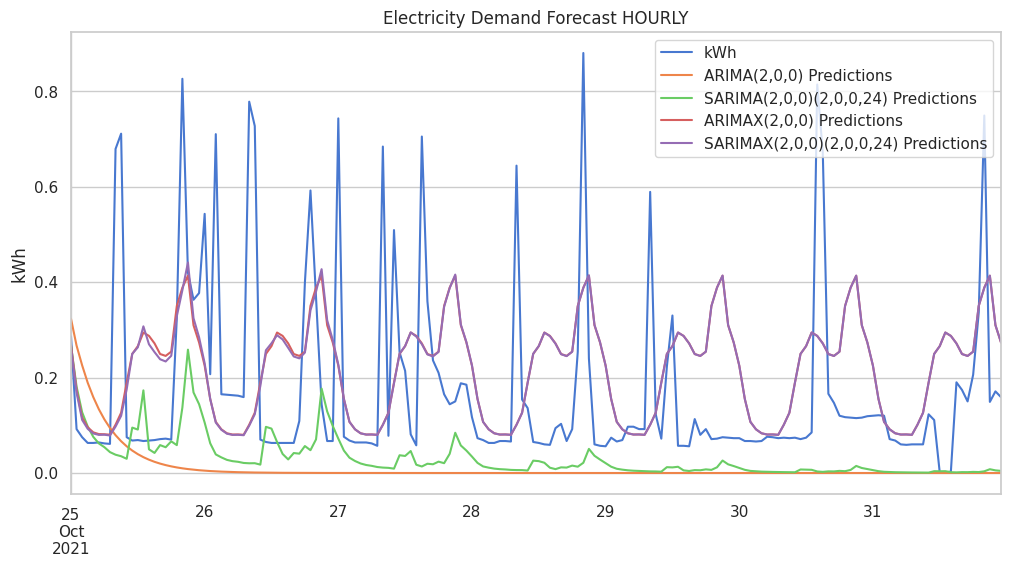

In [ ]:
# plot predictions
title='Electricity Demand Forecast HOURLY'
ylabel='kWh'
xlabel=''

ax = test1['kWh'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions3.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate MSE and RMSE for each model
def calculate_errors(true_values, predicted_values, model_name):
    mse = mean_squared_error(true_values, predicted_values)
    rmse = np.sqrt(mse)
    print(f'{model_name} MSE Error: {mse:.3f}')
    print(f'{model_name} RMSE Error: {rmse:.3f}')

# Actual values
actual = test1['kWh']

# Calculate errors for each model
calculate_errors(actual, predictions, 'ARIMA(2,0,0)')
calculate_errors(actual, predictions1, 'SARIMA(2,0,0)(2,0,0,24)')
calculate_errors(actual, predictions2, 'ARIMAX(2,0,0)')
calculate_errors(actual, predictions3, 'SARIMAX(2,0,0)(2,0,0,24)')


ARIMA(2,0,0) MSE Error: 0.069
ARIMA(2,0,0) RMSE Error: 0.263
SARIMA(2,0,0)(2,0,0,24) MSE Error: 0.060
SARIMA(2,0,0)(2,0,0,24) RMSE Error: 0.245
ARIMAX(2,0,0) MSE Error: 0.046
ARIMAX(2,0,0) RMSE Error: 0.213
SARIMAX(2,0,0)(2,0,0,24) MSE Error: 0.046
SARIMAX(2,0,0)(2,0,0,24) RMSE Error: 0.214


 conclude that so far the best performing models on this problem according to an RMSE of 0.213 and 0.214 are the ARIMAX(2,0,0) and SARIMAX(2,0,0)(2,0,0,24). It is worth mentioning that the ARIMAX model is significantly less complex and took less time to execute than the SARIMAX.

##Hourly Forecasts with Autoregressive univariate LSTM

In [ ]:
# import libraries for Deep Learning
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
# prepare data
df = df_input[['kWh']]

In [ ]:
# Train Test set split - we want to forecast 1 week or 168 observations into the future so out test set should be at least one week
len(df)
# we will go with a 168 observations test set
train =  df[:len(df)-168]
test = df[len(df)-168:]
len(df) == len(train) + len(test)

True

In [ ]:
# Scale data
scaler = MinMaxScaler()

In [ ]:
# Only fit to train data else we are leaking information into our test data
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)
# scaled_train = train
# scaled_test = test

In [ ]:
# Let's define to get 168 Days back wich represents exactly one week and then predict the next week out
n_input = 168
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=10)

# Define Simple LSTM model

In [ ]:
# define model
model = Sequential()
model.add(LSTM(16, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))

In [ ]:
# comile model
model.compile(optimizer='adam', loss='mse')

# get model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1152      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1169 (4.57 KB)
Trainable params: 1169 (4.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
